In [18]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

In [19]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# For GPU.
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_CUDNN_DETERMINISTIC"] = "1"

In [20]:
# Load data and do train-test split
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

X_val   = X_train_all[:10000]
X_train = X_train_all[10000:]
y_val   = y_train_all[:10000]
y_train = y_train_all[10000:]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


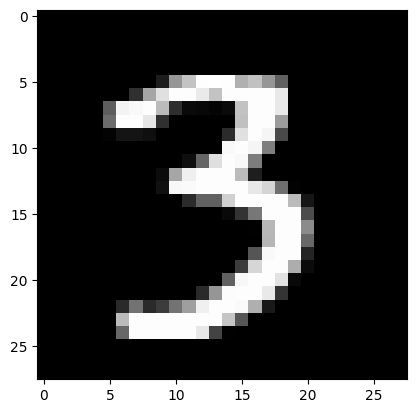

In [21]:
plt.imshow(X_train[0]);

In [22]:
# Prepare image data
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype("float32") / 255

X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype("float32") / 255

X_val = X_val.reshape((X_val.shape[0], 28 * 28))
X_val = X_val.astype("float32") / 255

In [23]:
# Model Architecture
# Instantiate the model.
model = tf.keras.Sequential()

# Add the single neuron.
model.add(Dense(10, input_shape=(784,), activation="softmax"))

# Display the model summary.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Complie

In [25]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [26]:
# Train the model
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=128,
                    verbose=False,
                    validation_data=(X_val, y_val));

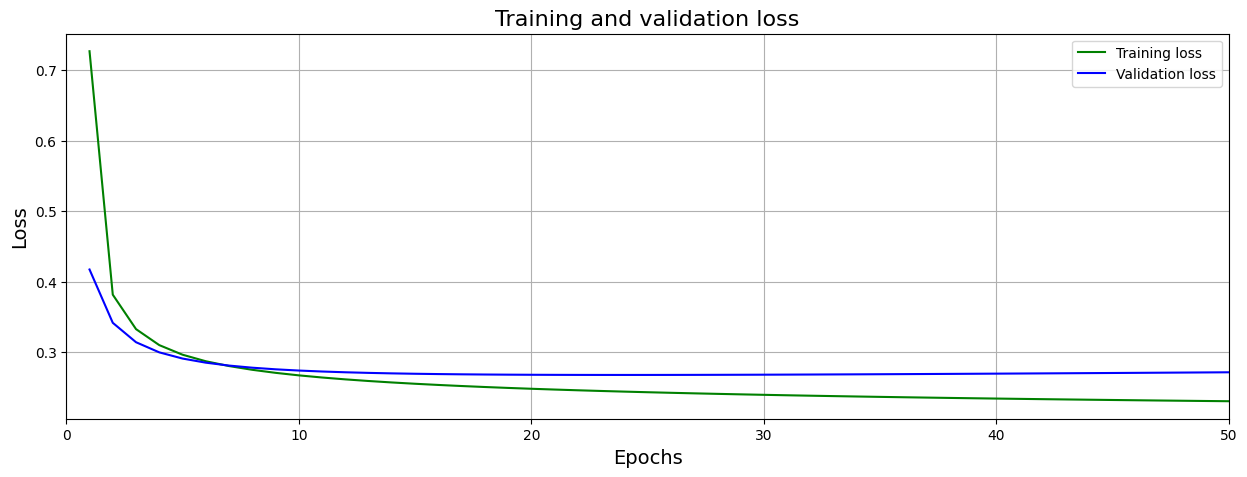

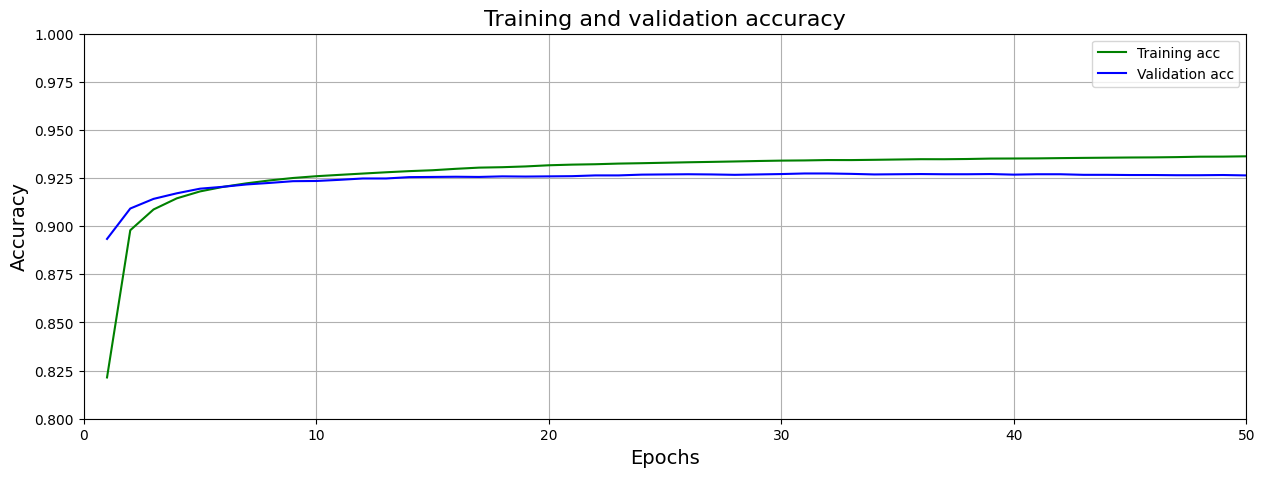

In [27]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=[15, 5])
plt.plot(epochs, loss_values, "g", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xlim(0, 50)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=[15, 5])
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "g", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xlim(0, 50)
plt.ylim(.8, 1.0)
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Save the model
# Using the save() method, the model will be saved to the file system in the 'SavedModel' format.
model.save('MNIST_classifer_model.keras')

In [31]:
# Loding models
from tensorflow.keras import models
MNIST_classifer_model = models.load_model('MNIST_classifer_model.keras')

In [32]:
#  Make prediction on sample image
predictions = MNIST_classifer_model.predict(X_test)
index = 0 # up to 9999
print('Ground truth for test digit: ',y_test[index])
print('\n');
print('Predictions for each class:\n')
for i in range(10):
    print('digit:', i, ' probability: ', predictions[index][i])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Ground truth for test digit:  7


Predictions for each class:

digit: 0  probability:  1.4038494e-08
digit: 1  probability:  2.6679048e-14
digit: 2  probability:  2.0263039e-07
digit: 3  probability:  0.0022654664
digit: 4  probability:  1.2183237e-07
digit: 5  probability:  2.7240263e-05
digit: 6  probability:  3.6569456e-13
digit: 7  probability:  0.99749327
digit: 8  probability:  9.330929e-06
digit: 9  probability:  0.00020437856


In [33]:
# Confusion matrix
predictions = MNIST_classifer_model.predict(X_test)
predicted_labels = [np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


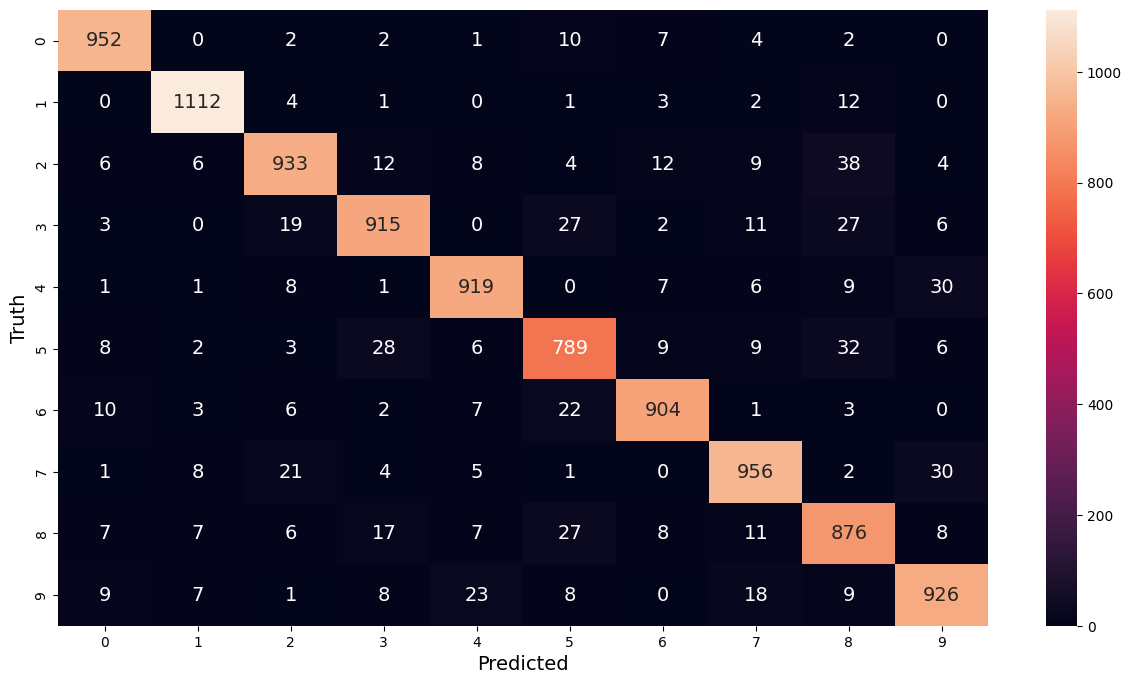

In [34]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)

plt.figure(figsize=[15, 8])
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

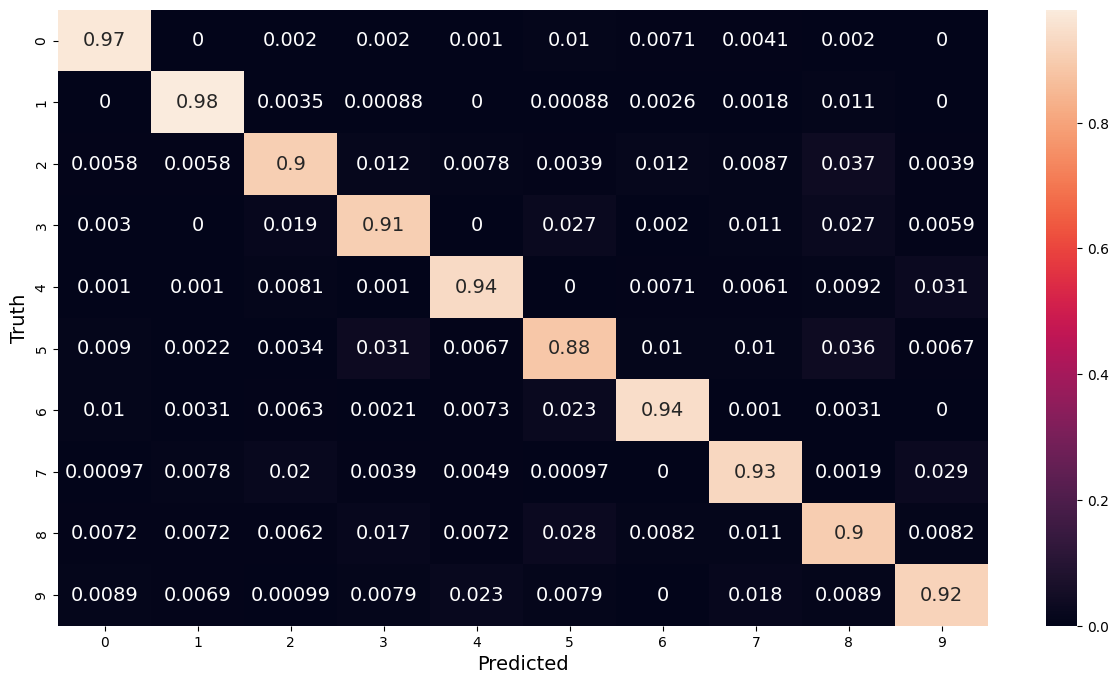

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=predicted_labels, normalize='true')

plt.figure(figsize=[15, 8])
import seaborn as sn
sn.heatmap(cm, annot=True, annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

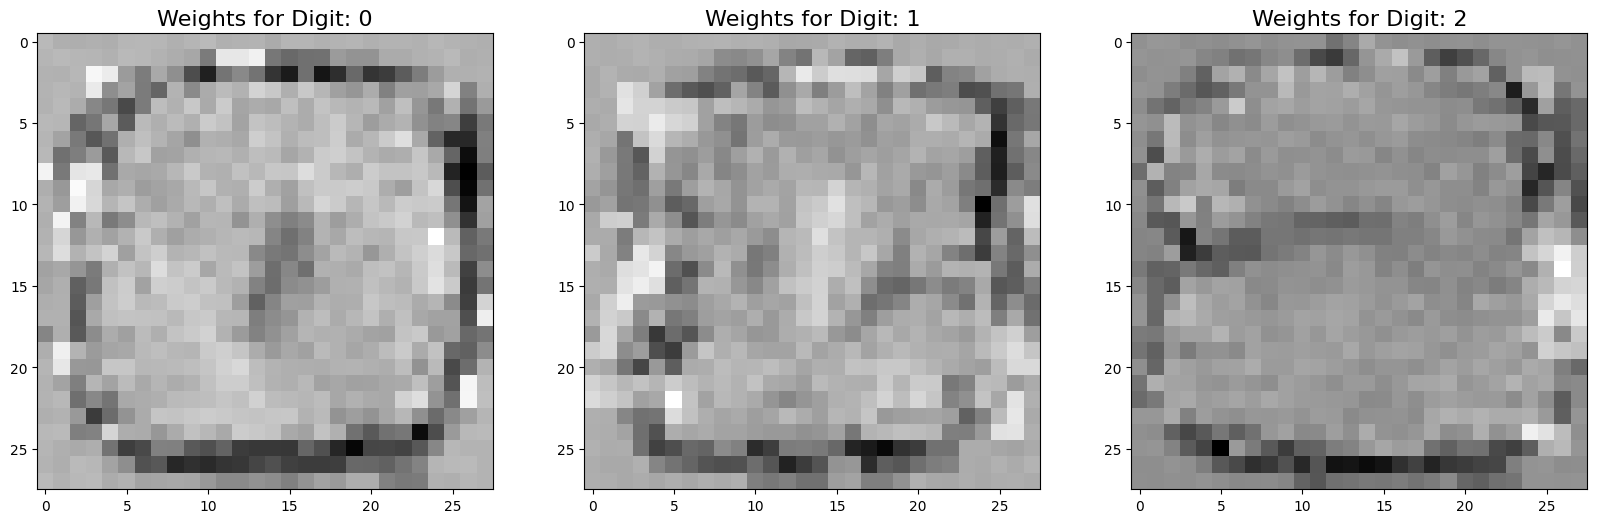

In [36]:
# Interpretation of weights
weights = MNIST_classifer_model.layers[0].get_weights()[0]
bias    = MNIST_classifer_model.layers[0].get_weights()[1]

weights_0 = weights[:,0] + bias[0]
weights_0 = np.reshape(weights_0, (28,28,1))

weights_1 = weights[:,1] + bias[1]
weights_1 = tf.reshape(weights_1, (28,28,1))

weights_2 = weights[:,2] + bias[2]
weights_2 = tf.reshape(weights_2, (28,28,1))

plt.figure(figsize=(20, 7))
plt.subplot(131); plt.title('Weights for Digit: 0'); plt.imshow(weights_0)
plt.subplot(132); plt.title('Weights for Digit: 1'); plt.imshow(weights_1)
plt.subplot(133); plt.title('Weights for Digit: 2'); plt.imshow(weights_2);

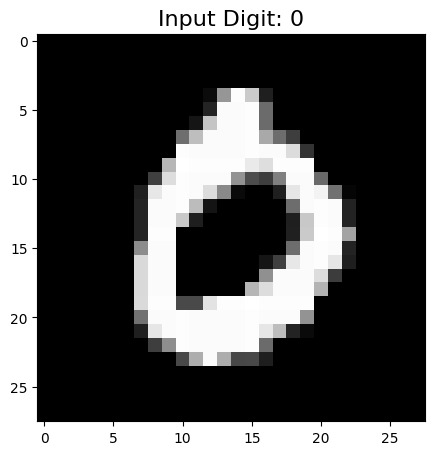

In [37]:
plt.figure(figsize=(17,6))
input_0 = np.reshape(X_test[3], (28,28,1))
plt.subplot(131); plt.title('Input Digit: 0'); plt.imshow(input_0);